# Tarea 2

## Problema 1
### (a) Usando SimPy demostrar que


$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [107]:
from sympy.interactive import printing
from sympy import *

xi,yi,b0,b1,n=symbols('x y beta_0 beta_1 n')

j=Function('J')
(j(b0,b1))

J(beta_0, beta_1)

In [109]:

#Por definición tenemos que J(beta_0,beta_1) es igual a:
s=(1/(2*n))*Sum(((yi)-(b0)-(b1*(xi)))**2,(i,1,n))
s

Sum((-beta_0 - beta_1*x + y)**2, (i, 1, n))/(2*n)

In [128]:
d0=diff(s,b0)
d0

Sum(2*beta_0 + 2*beta_1*x - 2*y, (i, 1, n))/(2*n)

In [129]:
d1=diff(s,b1)
d1

Sum(-2*x*(-beta_0 - beta_1*x + y), (i, 1, n))/(2*n)

In [133]:
(d0+d1)

Sum(-2*x*(-beta_0 - beta_1*x + y), (i, 1, n))/(2*n) + Sum(2*beta_0 + 2*beta_1*x - 2*y, (i, 1, n))/(2*n)


$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

## Problema 2
### (a) Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno.



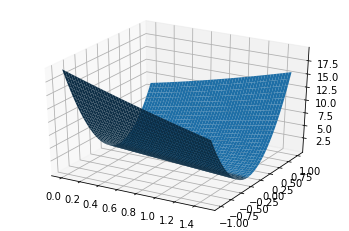

In [162]:
import numpy as np
import matplotlib.pyplot as plt

x=np.loadtxt('edad.dat')
y=np.loadtxt('altura.dat')

#No le tomé foto, solo tomé apuntes muy rápido
costo=0
b0=np.arange(0,1.5,0.001)
b1=np.arange(-1,1,0.001)
B0,B1=np.meshgrid(b0,b1)

for i in range(len(y)):
    costo+=(y[i]-B0-B1*x[i])**2/(2*len(y))

C=costo

fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(B0,B1,C)

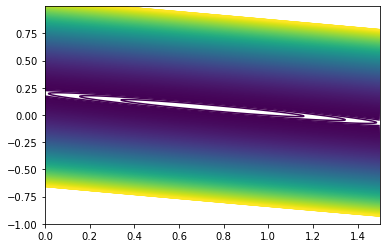

In [163]:
plt.contour(B0,B1,C,levels=np.arange(0,10,0.01))

### (b) Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.



### (c) Modifique el widget para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.



### (d) Agrega al widget un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este widget)

## Problema 3
### (a) Usando los datos de chirps.txt

In [137]:
import numpy as np
import matplotlib.pyplot as plt

%cat chirps.txt

chirps=np.loadtxt('chirps.txt')
datos=chirps[:,0]
Temp=chirps[:,1]

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3



Entregar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

NOTA: Datos obtenidos de aquí

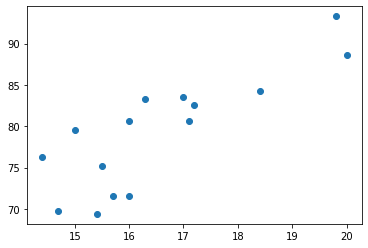

In [155]:

xiyi=0
xi=0
yi=0
n=len(datos)


plt.scatter(datos,Temp)


In [156]:
class RegresionLineal:
    def __init__(self, alpha=0.5, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m
    
    
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('chrips/s ')
    ax[0].set_ylabel('temperatura')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

In [157]:
r=RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)
r.gradientDescent(datos, Temp)

<ipython-input-156-8e3aeb7e3ebc>:40: RuntimeWarning: invalid value encountered in double_scalars
  if abs(J - prep_J) <= self.tols:
<ipython-input-156-8e3aeb7e3ebc>:36: RuntimeWarning: invalid value encountered in subtract
  self.beta = self.beta - self.alpha * self.gradiente(Xt, y)


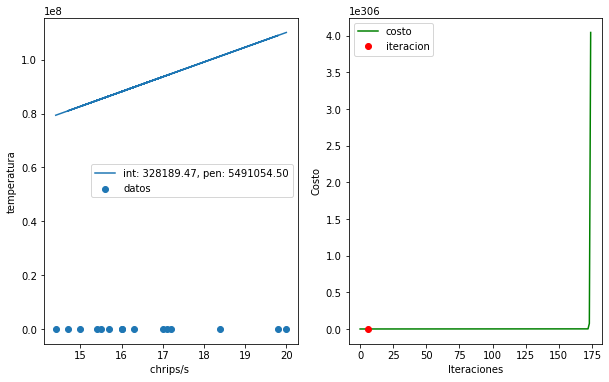

In [158]:
plotModelo(datos,Temp, r, 6)

## Problema 4
### (a) Usando los datos del cuarteto de Anscombe Calcule la regresión lineal ¿Qué sucede?

## Problema 5
### Use el archivo radioactive_decay.dat

In [165]:
%cat radioactive_decay.txt

rad=np.loadtxt('radioactive_decay.txt')
time=rad[:,0]
N_rem=rad[:,1]

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


### (a) Grafique los datos ¿Qué forma tienen?



Text(0.5, 0, 'Time')

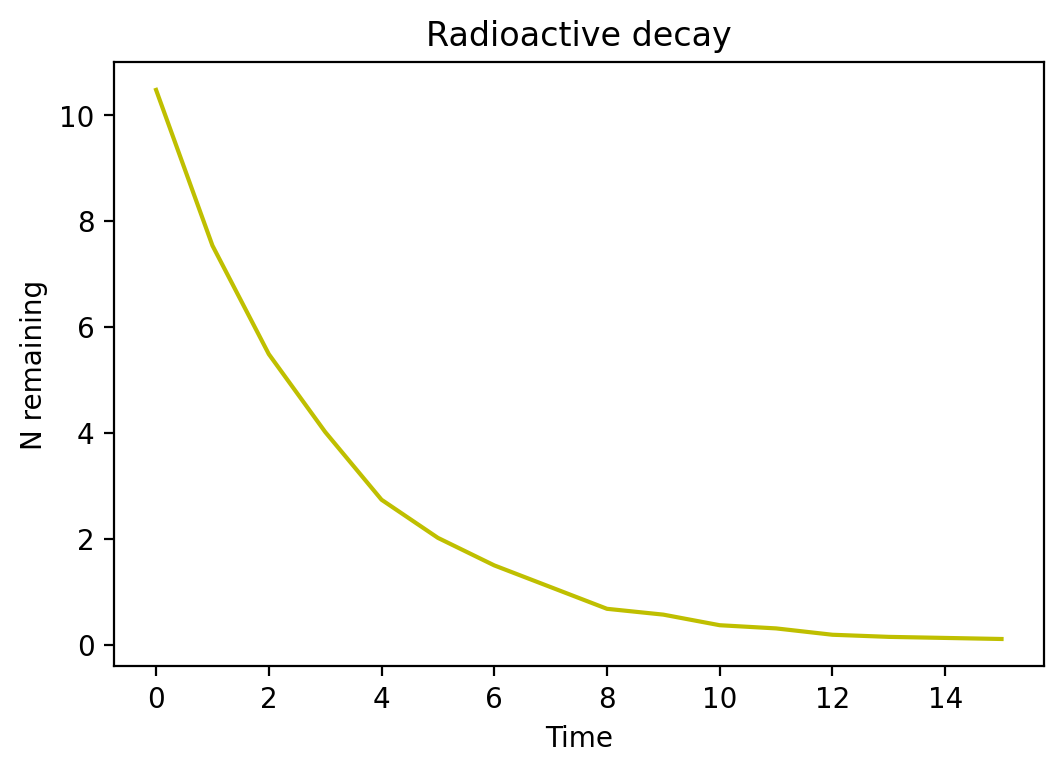

In [166]:
plt.figure(figsize=(6, 4), dpi=200)
plt.plot(time,N_rem,color='y', linewidth=1.5)
plt.title('Radioactive decay')
plt.ylabel('N remaining') 
plt.xlabel('Time')


### (b) ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado transform_radioactive_decay.txt



### (c) Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.


<ipython-input-156-8e3aeb7e3ebc>:40: RuntimeWarning: invalid value encountered in double_scalars
  if abs(J - prep_J) <= self.tols:


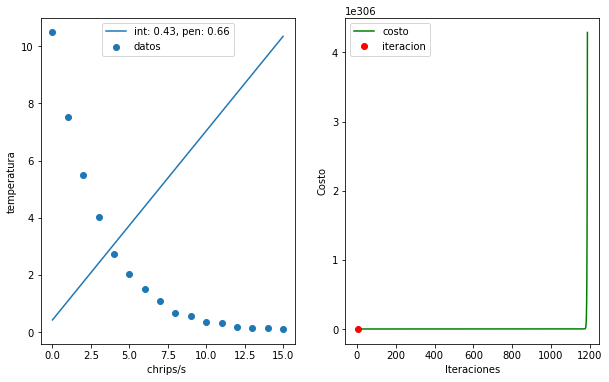

In [169]:
r2=RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)
r2.gradientDescent(time, N_rem)

plotModelo(time,N_rem, r2, 6)

### (d) ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.